<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
# Kerakli modullarni va ma'lumotlarni o'qib olamiz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# Onlayn dataset manzilini ko'rsatamiz
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

## 1-QADAM Biznes (Faoliyatni) o'rganish

###1.1 Jarayonlarni tushunish

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


###1.2 Analitik yondashuv
- ML turi - Supervized
- Model turi - Regressiya
- Usul - offline

-

## 2-QADAM Ma'lumotlarni o'rganish

###2.1 Grafiklar

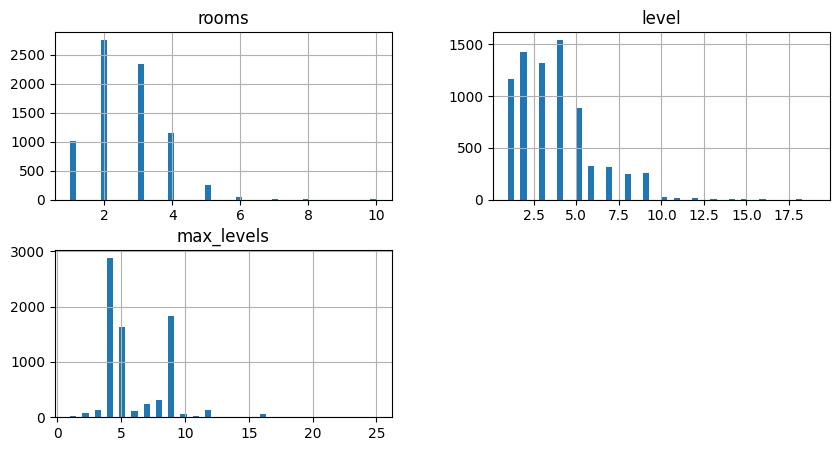

In [3]:
%matplotlib inline
df.hist(bins=50, figsize=(10,5))
plt.show()

In [ ]:
# location ustunidagi ma'lumotlarni alohida qilamiz kvartalni ajratib olib yangi ustun sifatida tekshirib ko'ramiz
# Splitting the 'location' column by commas and creating new columns
split_columns = df['location'].str.split(',', expand=True)
# Selecting only the relevant columns (first three columns)
split_columns = split_columns.iloc[:, :3]
# Assigning column names
split_columns.columns = ['city', 'district_loc', 'street']
# Concatenating the split columns with the original DataFrame
df = pd.concat([df, split_columns], axis=1)
# Dropping the original 'location' column city va district_loc ustunlariga ehtiyoj bo'lmaganligi uchun tashlab yuboramiz
df.drop(['city', 'district_loc','location'], axis=1, inplace=True)
df.head()

In [33]:
# city va district_loc ustunlariga ehtiyoj bo'lmaganligi uchun tashlab yuboramiz
df.drop(['city', 'district_loc'], axis=1, inplace=True)
df.head()

,district,rooms,size,level,max_levels,price,street
0,Юнусабадский,3,57,4,4,52000,Юнусабад 8-й квартал
1,Яккасарайский,2,52,4,5,56000,1-й тупик Шота Руставели
2,Чиланзарский,2,42,4,4,37000,Чиланзар 2-й квартал
3,Чиланзарский,3,65,1,4,49500,Чиланзар 9-й квартал
4,Чиланзарский,3,70,3,5,55000,площадь Актепа


### 2.2 Train va Test

In [6]:
# Ma'lumotlarni train (80 %) va test (20 %)ga ajratamiz
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_set.head()

,district,rooms,size,level,max_levels,price,street
4552,Учтепинский,2,52,3,4,37000,Чиланзар квартал Г9А
4450,Мирзо-Улугбекский,4,187,2,5,210000,Буюк Ипак Йули
1656,Яккасарайский,1,39,2,5,27500,Кушбеги
3570,Юнусабадский,2,74,3,6,46835,Юнусабад 6-й квартал
6618,Шайхантахурский,4,165,4,7,140000,Беруни


##2.3 Ma'lumotlarni tahlil qilamiz

In [8]:
housing = train_set.copy()
housing.head()

,district,rooms,size,level,max_levels,price,street
4552,Учтепинский,2,52,3,4,37000,Чиланзар квартал Г9А
4450,Мирзо-Улугбекский,4,187,2,5,210000,Буюк Ипак Йули
1656,Яккасарайский,1,39,2,5,27500,Кушбеги
3570,Юнусабадский,2,74,3,6,46835,Юнусабад 6-й квартал
6618,Шайхантахурский,4,165,4,7,140000,Беруни


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6052 entries, 4552 to 7270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    6052 non-null   object
 1   rooms       6052 non-null   int64 
 2   size        6052 non-null   object
 3   level       6052 non-null   int64 
 4   max_levels  6052 non-null   int64 
 5   price       6052 non-null   object
 6   street      6028 non-null   object
dtypes: int64(3), object(4)
memory usage: 378.2+ KB


##Vizualizatsiya

In [13]:
#sonlik qiymatlar formatini to'g'rillab, orasida noodatiy qiymatlarni nullga o'zgartiramiz
housing['size'] = pd.to_numeric(housing['size'], errors='coerce')
housing['price'] = pd.to_numeric(housing['price'], errors='coerce')

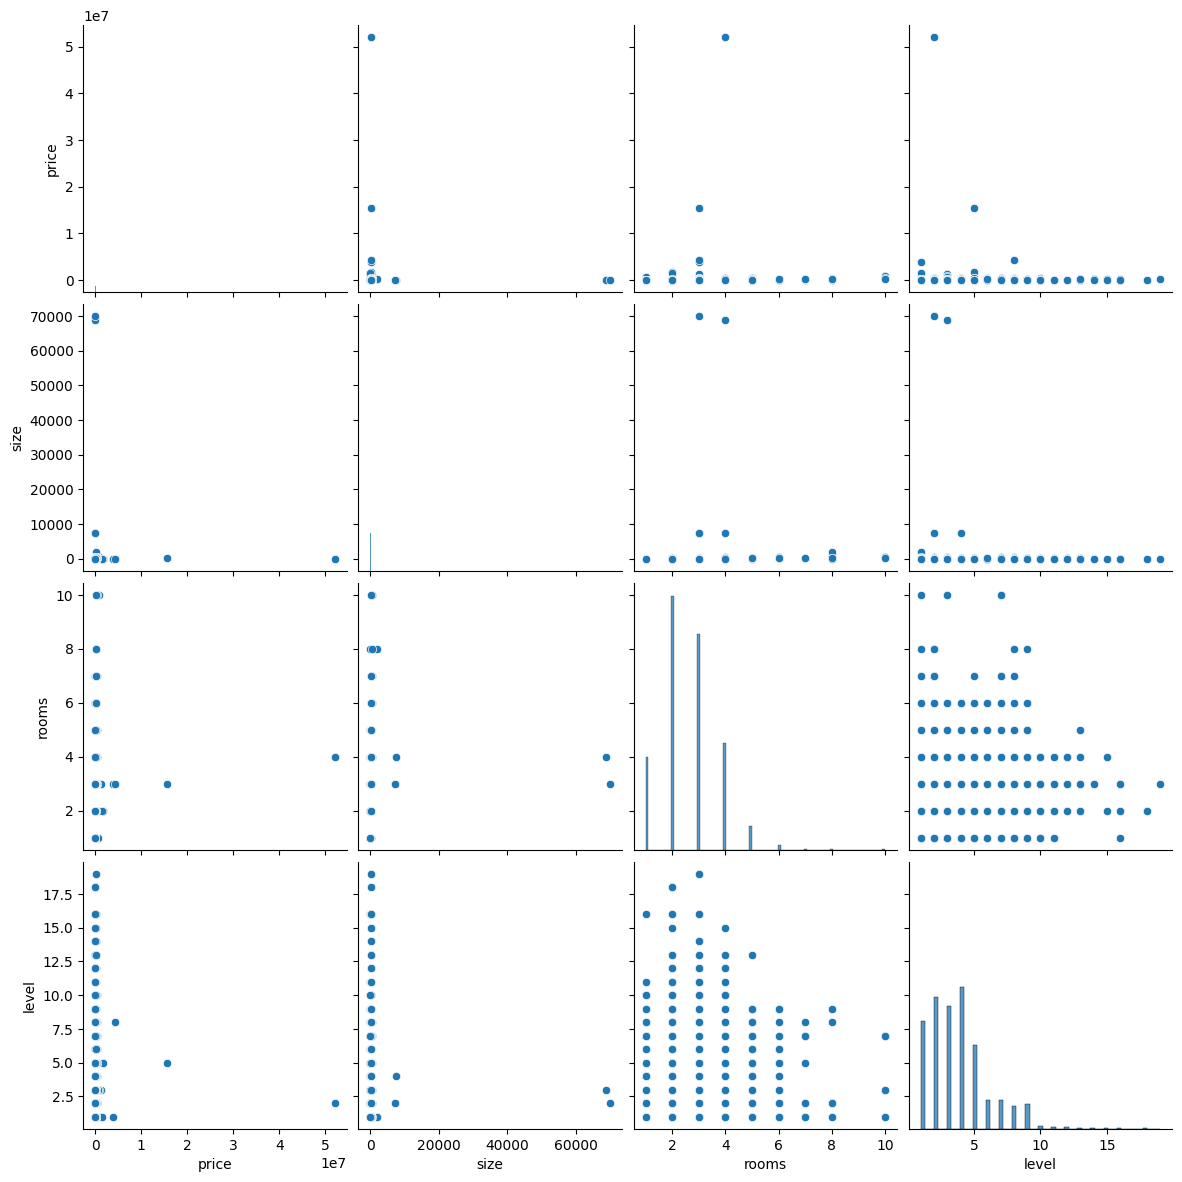

In [15]:
cols = ['price','size','rooms','level']
sns.pairplot(housing[cols], height=3)
plt.show()

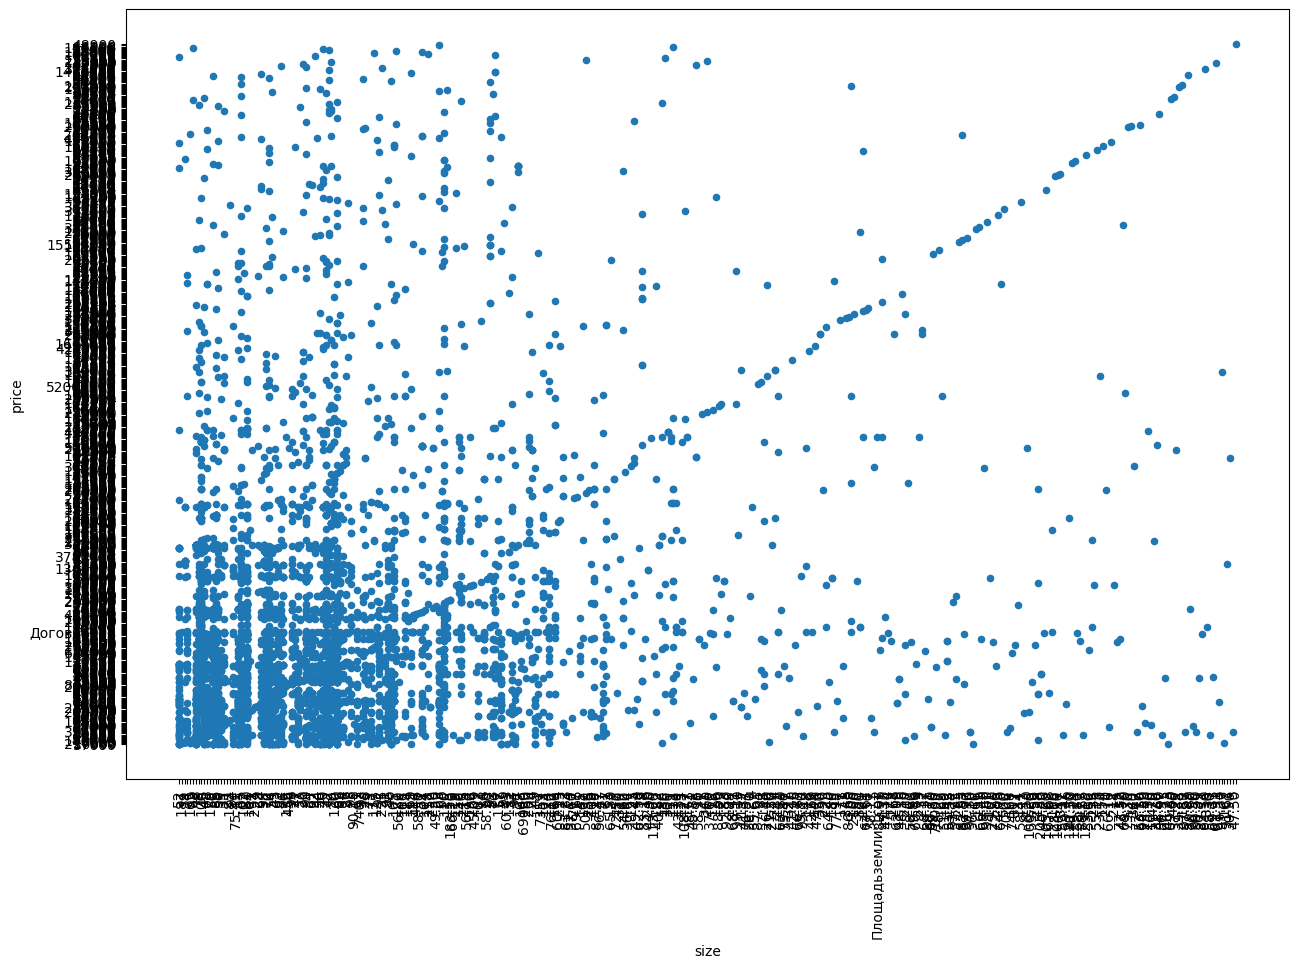

In [11]:
housing.plot(kind="scatter", x="size", y="price", figsize=(15,10))
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

##2.3 Korrelyatsiya

In [ ]:
housing_num = housing.drop('district', axis=1)
housing_num.head()

,rooms,size,level,max_levels,price,size_price
4552,2,52.0,3,4,37000.0,711.538462
4450,4,187.0,2,5,210000.0,1122.994652
1656,1,39.0,2,5,27500.0,705.128205
3570,2,74.0,3,6,46835.0,632.905405
6618,4,165.0,4,7,140000.0,848.484848


In [ ]:
housing_num.corrwith(housing_num['price']).sort_values(ascending=False)

price         1.000000
size_price    0.988325
rooms         0.053628
max_levels    0.011113
size          0.001556
level        -0.003067
dtype: float64

##2.4 Yangi qiymatlar yaratish

In [ ]:
#Mavjud qiymatlardan yangi qiymatlar yaratish imkoni bo'lsa yaratiladi
# housing['size_price'] =  housing['price'] / housing['size']  # bu ustun hozircha foydasi tegmaydi

In [ ]:
housing.head()

,district,rooms,size,level,max_levels,price,size_price
4552,Учтепинский,2,52.0,3,4,37000.0,711.538462
4450,Мирзо-Улугбекский,4,187.0,2,5,210000.0,1122.994652
1656,Яккасарайский,1,39.0,2,5,27500.0,705.128205
3570,Юнусабадский,2,74.0,3,6,46835.0,632.905405
6618,Шайхантахурский,4,165.0,4,7,140000.0,848.484848


##3-QADAM Ma'lumotlarni ML uchun tayyorlash

In [75]:
# Onlayn dataset manzilini ko'rsatamiz
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [76]:
# location ustunidagi ma'lumotlarni alohida qilamiz kvartalni ajratib olib yangi ustun sifatida tekshirib ko'ramiz

# Splitting the 'location' column by commas and creating new columns
split_columns = df['location'].str.split(',', expand=True)

# Selecting only the relevant columns (first three columns)
split_columns = split_columns.iloc[:, :3]

# Assigning column names
split_columns.columns = ['city', 'district_loc', 'street']

# Concatenating the split columns with the original DataFrame
df = pd.concat([df, split_columns], axis=1)

# Dropping the original 'location' column city va district_loc ustunlariga ehtiyoj bo'lmaganligi uchun tashlab yuboramiz
df.drop(['city', 'district_loc','location'], axis=1, inplace=True)

df.head()

,district,rooms,size,level,max_levels,price,street
0,Юнусабадский,3,57,4,4,52000,Юнусабад 8-й квартал
1,Яккасарайский,2,52,4,5,56000,1-й тупик Шота Руставели
2,Чиланзарский,2,42,4,4,37000,Чиланзар 2-й квартал
3,Чиланзарский,3,65,1,4,49500,Чиланзар 9-й квартал
4,Чиланзарский,3,70,3,5,55000,площадь Актепа


###Ma'lumotlarni train va test setga ajratamiz.
1. Oddiy (muvozanatsiz) train/test set

In [77]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

###2. Muvozanatli (Stratified) train/test set

In [62]:
# df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

# from sklearn.model_selection import StratifiedShuffleSplit
# stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# # stratified_split.split funksiyasi indekslar qaytaradi
# for train_index, test_index in stratified_split.split(df,df['income_cat']):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]
# strat_train_set.drop('income_cat', axis=1, inplace=True)
# strat_test_set.drop('income_cat', axis=1, inplace=True)

In [78]:
#Ishlash uchun oddiy (muvozanatsiz) train/test setni tanlaymiz
housing = train_set.drop('price', axis=1)
housing_labels = train_set['price'].copy()

In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6052 entries, 4552 to 7270
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    6052 non-null   object
 1   rooms       6052 non-null   int64 
 2   size        6052 non-null   object
 3   level       6052 non-null   int64 
 4   max_levels  6052 non-null   int64 
 5   street      6028 non-null   object
dtypes: int64(3), object(3)
memory usage: 331.0+ KB


### 3.1 Tozalash

In [ ]:
# 1-usul NaN qatorlarni tashlab yuborish
# housing.dropna(subset=['size'], inplace=True)
# housing.dropna(subset=['price'], inplace=True)
# housing.dropna(subset=['street'], inplace=True)

In [ ]:
# 2-usul NaN mavjud bo'lgan ustunni tashlab yuborish
# housing.drop(['district'], axis=1, inplace=True)

In [ ]:
# 3-usul NaN qiymatlarni boshqa qiymatlar bilan almashtirish

# median = housing['size'].median()
# housing['size'].fillna(median, inplace=True)

In [80]:
#sonlik qiymatlar formatini to'g'rillab, orasida noodatiy qiymatlarni nullga o'zgartiramiz
housing['size'] = pd.to_numeric(housing['size'], errors='coerce')

##SimpleImputer
- median qiymatlarni har bir ustun uchun hisoblab NaN qiymatlar o'rniga avtomatik to'ldirish

In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop(['district', 'street'], axis=1) # raqamli bo'lmagan qiymatlarni tashlab yuborib alohida o'zgaruvchiga yuklaymiz
X = imputer.fit_transform(housing_num) # Ustunlardagi median qiymatni hisoblab NaN o'rniga avtomatik qo'yamiz va o'zgaruvchiga saqlaymiz

In [82]:
# transform bo'lgan qiymatni data framega o'giramiz
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,rooms,size,level,max_levels
4552,2.0,52.0,3.0,4.0
4450,4.0,187.0,2.0,5.0
1656,1.0,39.0,2.0,5.0
3570,2.0,74.0,3.0,6.0
6618,4.0,165.0,4.0,7.0


## Matnli ustunlar bilan ishlash

In [84]:
housing_cat = housing[['district', 'street']]
housing_cat.value_counts()

district           street                
Чиланзарский        Чиланзар                 90
Яккасарайский       Кушбеги                  86
Учтепинский         Чиланзар 24-й квартал    70
Мирзо-Улугбекский   Буюк Ипак Йули           68
Мирабадский         Госпитальный             62
                                             ..
Учтепинский         1-й проезд Фазылтепа      1
                    1-й проезд Фархада        1
                    1-й проезд Хондамир       1
                    124                       1
Яшнободский         ул Садик Азимова          1
Name: count, Length: 1382, dtype: int64

###OrdinalEncoder

In [86]:
# Bizni holatimizda OrdinalEncoder mos kelmaydi
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
housing_cat_encoded = ord_enc.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[   5., 1050.],
       [   2.,  342.],
       [   9.,  540.],
       [   8., 1181.],
       [   7.,  308.]])

###OneHotEncoder

In [89]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 3.4 Standartizasiya va normalizasiya

Ahamiyat bersangiz, bizdagi ustunlardagi qiymatlar diapazoni turlicha, masalan:
- `size` - `1-70000` oralig'ida
- `rooms` esa `1-10` oralig'ida
- `max_levels` - `1-25` oralig'ida

Bularning hammasi kelgusi hisob kitoblarda algoritmlarning to'gri ishlashiga ta'sir ko'rsatadi.

Buning oldini olish uchun barcha ustundagi qiymatlarni bir diapazonga keltirib olish tavsiya qilinadi.

Buning uchun ML da min-max normallashtirish (_min-max scaling_) yoki standartlash (_standartization_) qo'llaniladi.

In [90]:
housing.describe()

,rooms,size,level,max_levels
count,6052.000000,6051.000000,6052.000000,6052.000000
mean,2.631527,100.513001,3.701091,6.044283
std,1.093717,1273.319532,2.242462,2.589535
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,66.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,70000.000000,19.000000,25.000000


###MinMaxScaleer

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_mix_scaler = MinMaxScaler()

min_mix_scaler.fit_transform(housing_num)

###StandartScaler

In [91]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)


array([[-0.57746118, -0.03810278, -0.31266907, -0.78950544],
       [ 1.25131698,  0.06792808, -0.75864437, -0.40330378],
       [-1.49185026, -0.04831316, -0.75864437, -0.40330378],
       ...,
       [-0.57746118, -0.04045902, -1.20461968, -1.1757071 ],
       [-0.57746118, -0.03181947, -0.31266907, -0.78950544],
       [ 0.3369279 , -0.00668623, -0.75864437,  1.14150286]])

# Pipeline - Konveyer

In [ ]:
# Calculate the IQR for every column
def df_iqr(df_new, column, high=0.95, low=0.05):
    room_iqr = df_new[column].quantile(high) - df_new[column].quantile(low)

    # Define lower and upper bounds
    lower_bound = df_new[column].quantile(low) - 1.5 * room_iqr
    upper_bound = df_new[column].quantile(high) + 1.5 * room_iqr
    mask = (df_new[column] < lower_bound) | (df_new[column] > upper_bound)
    count = len(df_new[mask])
    if count!=0:
        print(f"{column}: {count}")
    # Filter the dataframe based on the IQR range for each 'column'
    filtered_df = df_new[~mask]
    return filtered_df

In [ ]:
# df ni yangi o'zgaruvchiga yuklash
df1 = df.copy()

#sonlik qiymatlar formatini to'g'rillab, orasida noodatiy qiymatlarni nullga o'zgartiramiz
df1['size'] = pd.to_numeric(df1['size'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# NaN qiymatlarni tashlab yuboramiz
df1.dropna(subset=['size'], inplace=True)
df1.dropna(subset=['price'], inplace=True)

# Narxi 10000 dan kichiklarini tashlab yuboramiz
df1.drop(df1[(df1['price'] < 10000)|(df1['price'] > 174000)].index, inplace=True)

# Maydoni 225 m kv dan kattalarini va 40 m kv dan kichiklarini tashlab yuboramiz
df1.drop(df1[(df1['size'] > 225) | (df1['size'] < 40)].index, inplace=True)

# xonalari 6 tadan katta, 10 qavatdan baland va 2 qavatdan kichik uylarni tashlab yuboramiz
df1.drop(df1[(df1.rooms>6) | (df.max_levels>10) | (df.level>10) | (df.max_levels<2)].index, inplace=True)

#matnni songa o'girish
# from sklearn.preprocessing import OrdinalEncoder
# ord_enc = OrdinalEncoder()
# df1['location'] = ord_enc.fit_transform(df1[['location']])
# df1['district'] = ord_enc.fit_transform(df1[['district']])

# iqr yordamida ustunlardagi juda kichik yoki katta ma'lumotlarni tashlab yuboramiz
# df1 = df_iqr(df1, 'price', high=0.90, low=0.6)
df1 = df_iqr(df1, 'size', high=0.9, low=0.05)
# df_iqr(df1, 'price', high=0.90, low=0.1)['price'].min()

size: 24


<ipython-input-45-e273c9bdf603>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1.drop(df1[(df1.rooms>6) | (df.max_levels>10) | (df.level>10) | (df.max_levels<2)].index, inplace=True)


In [ ]:
df2 = df1.reset_index()
df2.corrwith(df2['price'])

index        -0.014165
location     -0.101832
district     -0.101468
rooms         0.543851
size          0.758257
level         0.021051
max_levels    0.229585
price         1.000000
dtype: float64

In [ ]:
df1.corrwith(df1['price'])

location     -0.101832
district     -0.101468
rooms         0.543851
size          0.758257
level         0.021051
max_levels    0.229585
price         1.000000
dtype: float64

In [ ]:

# Ma'lumotlarni train va testga ajratamiz
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num=X_train.drop("location", axis=1)

In [ ]:
X_train

,location,district,rooms,size,level,max_levels
1367,660.0,6.0,3,93.0,5,9
2419,1305.0,11.0,2,60.0,4,8
5707,81.0,1.0,4,120.0,1,4
6812,491.0,4.0,3,58.0,1,7
4338,97.0,1.0,4,122.0,3,5
...,...,...,...,...,...,...
4466,1033.0,8.0,4,83.0,3,5
6206,8.0,1.0,4,100.0,5,5
6247,591.0,5.0,2,50.0,1,4
6431,660.0,6.0,3,96.0,9,9


##Pipeline quramiz

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

# Sonli ustunlar uchun
num_pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])
num_attribs = list(X_num.columns)
cat_attribs = ['location', 'district']

# Matnli ustunlar uchun
cat_pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OrdinalEncoder()),
    ])

# full pipeline
full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs),
    ])

In [ ]:
X_train

,location,district,rooms,size,level,max_levels
1367,660.0,6.0,3,93.0,5,9
2419,1305.0,11.0,2,60.0,4,8
5707,81.0,1.0,4,120.0,1,4
6812,491.0,4.0,3,58.0,1,7
4338,97.0,1.0,4,122.0,3,5
...,...,...,...,...,...,...
4466,1033.0,8.0,4,83.0,3,5
6206,8.0,1.0,4,100.0,5,5
6247,591.0,5.0,2,50.0,1,4
6431,660.0,6.0,3,96.0,9,9


In [ ]:
# Pipeline (Konveyer) ni ishga tushirish
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[0:5,:]

array([[ 2.38113824e-01,  3.17988422e-01,  8.48257825e-01,
         6.65784294e-01,  1.43851785e+00,  5.69000000e+02],
       [ 1.96305704e+00, -7.60101096e-01, -5.03581342e-01,
         1.78024931e-01,  9.80284330e-01,  1.12200000e+03],
       [-1.48682940e+00,  1.39607794e+00,  1.95430805e+00,
        -1.28525316e+00, -8.52649751e-01,  7.40000000e+01],
       [-4.51863465e-01,  3.17988422e-01, -5.85510989e-01,
        -1.28525316e+00,  5.22050810e-01,  4.23000000e+02],
       [-1.48682940e+00,  1.39607794e+00,  2.03623770e+00,
        -3.09734432e-01, -3.94416231e-01,  8.80000000e+01]])

##Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [ ]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,location,district,rooms,size,level,max_levels
1745,165.0,2.0,3,78.0,3,5
1684,1130.0,9.0,3,90.0,3,3
266,324.0,2.0,4,86.0,3,4
749,1139.0,9.0,2,60.0,4,9
6958,193.0,2.0,4,95.0,5,5


In [ ]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

1745    55000.0
1684    75000.0
266     42000.0
749     50000.0
6958    46000.0
Name: price, dtype: float64

In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[146.,   2.,   2., 125.,   2.,   3.],
       [978.,   9.,   2., 147.,   2.,   1.],
       [284.,   2.,   3., 139.,   2.,   2.],
       [987.,   9.,   1.,  69.,   3.,   7.],
       [170.,   2.,   3., 157.,   4.,   3.]])

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([69359.56534781, 73244.55217578, 68465.74960219, 48673.65019106,
       73268.67417718])

In [ ]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
1745,69359.565348,55000.0
1684,73244.552176,75000.0
266,68465.749602,42000.0
749,48673.650191,50000.0
6958,73268.674177,46000.0


In [ ]:
# Normalizatsiya
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
housing_scaled = min_max_scaler.fit_transform(X_num)
housing_scaled

array([[0.54545455, 0.4       , 0.35099338, 0.44444444, 0.875     ],
       [1.        , 0.2       , 0.13245033, 0.33333333, 0.75      ],
       [0.09090909, 0.6       , 0.52980132, 0.        , 0.25      ],
       ...,
       [0.45454545, 0.2       , 0.06622517, 0.        , 0.25      ],
       [0.54545455, 0.4       , 0.37086093, 0.88888889, 0.875     ],
       [0.18181818, 0.2       , 0.06622517, 0.44444444, 0.375     ]])

In [ ]:
test_set

,location,district,rooms,size,level,max_levels,price
4849,1182.0,9.0,3,89.00,3,3,74999.0
7472,799.0,6.0,2,63.00,5,9,60000.0
839,324.0,2.0,2,43.00,1,4,29800.0
4311,725.0,6.0,1,40.00,3,4,28500.0
3131,783.0,6.0,2,50.00,4,5,34500.0
...,...,...,...,...,...,...,...
1678,1062.0,8.0,4,91.62,4,5,49000.0
350,324.0,2.0,2,48.00,1,4,34499.0
1337,592.0,5.0,3,100.00,3,4,71000.0
5075,1045.0,8.0,3,60.00,1,4,38500.0


In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,location,district,rooms,size,level,max_levels
4849,1182.0,9.0,3,89.00,3,3
7472,799.0,6.0,2,63.00,5,9
839,324.0,2.0,2,43.00,1,4
4311,725.0,6.0,1,40.00,3,4
3131,783.0,6.0,2,50.00,4,5
...,...,...,...,...,...,...
1678,1062.0,8.0,4,91.62,4,5
350,324.0,2.0,2,48.00,1,4
1337,592.0,5.0,3,100.00,3,4
5075,1045.0,8.0,3,60.00,1,4


In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

ValueError: Found unknown categories [0.002210759027266028, 0.01105379513633014, 0.02652910832719234, 0.03610906411201179, 0.04937361827560796, 0.0552689756816507, 0.05821665438467207, 0.061164333087693444, 0.07737656595431099, 0.0810611643330877, 0.08327192336035372, 0.08548268238761975, 0.08621960206337509, 0.08769344141488578, 0.10316875460574798, 0.10906411201179071, 0.1156963890935888, 0.11643330876934414, 0.12822402358142962, 0.13043478260869565, 0.14738393515106854, 0.16654384672070743, 0.16728076639646278, 0.17317612380250552, 0.1761238025055269, 0.1812822402358143, 0.18201915991156964, 0.184966838614591, 0.19602063375092116, 0.2033898305084746, 0.21002210759027268, 0.2144436256448047, 0.22254974207811348, 0.22770817980840088, 0.23065585851142226, 0.2328666175386883, 0.23581429624170966, 0.24244657332350775, 0.24465733235077378, 0.24760501105379515, 0.2483419307295505, 0.24981577008106118, 0.25350036845983787, 0.26529108327192336, 0.2844509948415623, 0.2851879145173176, 0.28592483419307296, 0.28887251289609434, 0.2947678703021371, 0.2969786293294031, 0.31098010316875463, 0.31319086219602066, 0.31982313927781875, 0.32129697862932943, 0.32350773765659546, 0.32498157700810615, 0.32645541635961683, 0.33087693441414884, 0.3316138540899042, 0.3404568901989683, 0.3426676492262343, 0.35519528371407516, 0.35666912306558585, 0.35814296241709653, 0.3596168017686072, 0.36845983787767134, 0.369933677229182, 0.37877671333824614, 0.38098747236551217, 0.3817243920412675, 0.38540899042004423, 0.4089904200442152, 0.41488577745025795, 0.417096536477524, 0.41930729550479, 0.42004421518054536, 0.4229918938835667, 0.42372881355932207, 0.42741341193809873, 0.4303610906411201, 0.45025792188651437, 0.4561532792925571, 0.45689019896831246, 0.4642593957258659, 0.46868091378039795, 0.4716285924834193, 0.48268238761974946, 0.48563006632277084, 0.4885777450257922, 0.48931466470154755, 0.4922623434045689, 0.501105379513633, 0.5018422991893884, 0.5040530582166544, 0.5158437730287398, 0.5232129697862933, 0.524686809137804, 0.5261606484893147, 0.5276344878408253, 0.5320560058953574, 0.5416359616801769, 0.5438467207074429, 0.5593220338983051, 0.5792188651436994, 0.5887988209285188, 0.5954310980103169, 0.6013264554163597, 0.6101694915254238, 0.6123802505526897, 0.6138540899042004, 0.6204863669859986, 0.6263817243920413, 0.6411201179071482, 0.6470154753131909, 0.6484893146647016, 0.6617538688282977, 0.6624907885040531, 0.6654384672070744, 0.686072218128224, 0.6875460574797347, 0.6890198968312454, 0.6963890935887989, 0.6971260132645541, 0.7133382461311717, 0.7229182019159912, 0.7280766396462786, 0.7317612380250553, 0.7324981577008106, 0.7487103905674282, 0.759027266028003, 0.7627118644067796, 0.765659543109801, 0.7722918201915991, 0.7737656595431098, 0.7789240972733972, 0.7862932940309506, 0.787030213706706, 0.7899778924097274, 0.7907148120854827, 0.7921886514369934, 0.7951363301400147, 0.7973470891672808, 0.8002947678703022, 0.8061901252763449, 0.8113485630066323, 0.8142962417096536, 0.8179808400884304, 0.8187177597641857, 0.8260869565217391, 0.8415622697126014, 0.8422991893883567, 0.8452468680913781, 0.8496683861459101, 0.8526160648489315, 0.8548268238761975, 0.8629329403095063, 0.871039056742815, 0.8747236551215918, 0.8754605747973471, 0.8798820928518791, 0.8813559322033898, 0.8835666912306559, 0.8931466470154753, 0.8938835666912307, 0.9019896831245394, 0.9027266028002948, 0.9086219602063376, 0.9108327192336035, 0.9123065585851142, 0.9137803979366249, 0.9189388356669124, 0.9218865143699337, 0.9322033898305085, 0.9432571849668386, 0.9447310243183493, 0.952837140751658, 0.9594694178334562, 0.971997052321297, 0.9815770081061165, 0.9852616064848931, 0.9911569638909359, 0.993367722918202, 0.997789240972734] in column 0 during transform

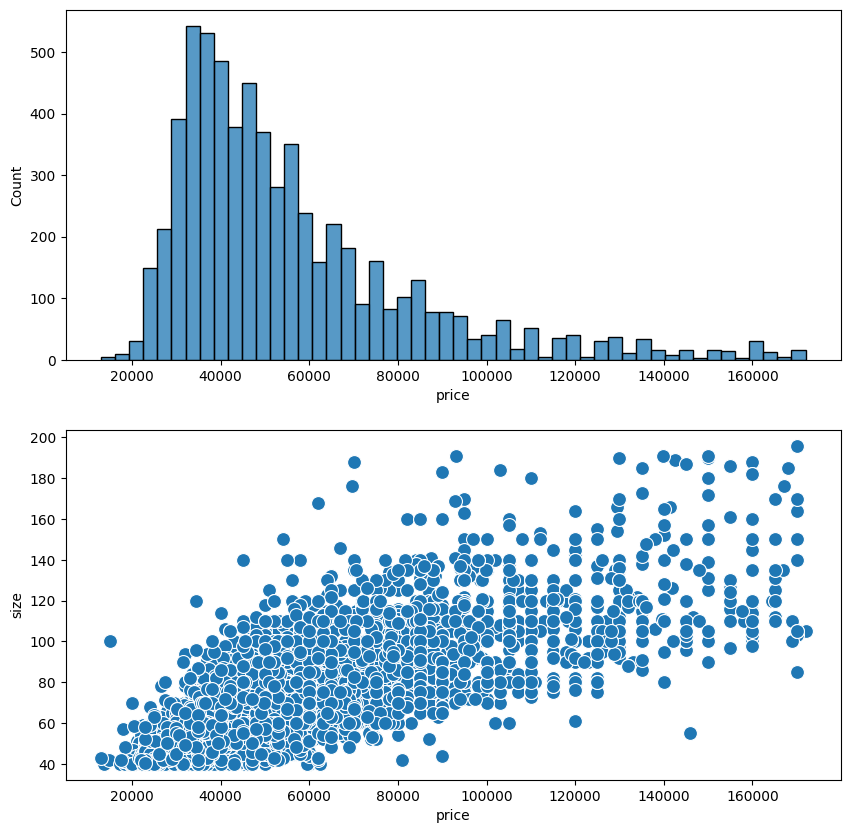

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.histplot(ax=ax[0], data=df1, x='price')
sns.scatterplot(data=df1, x='price', y='size', s=100)
plt.show()

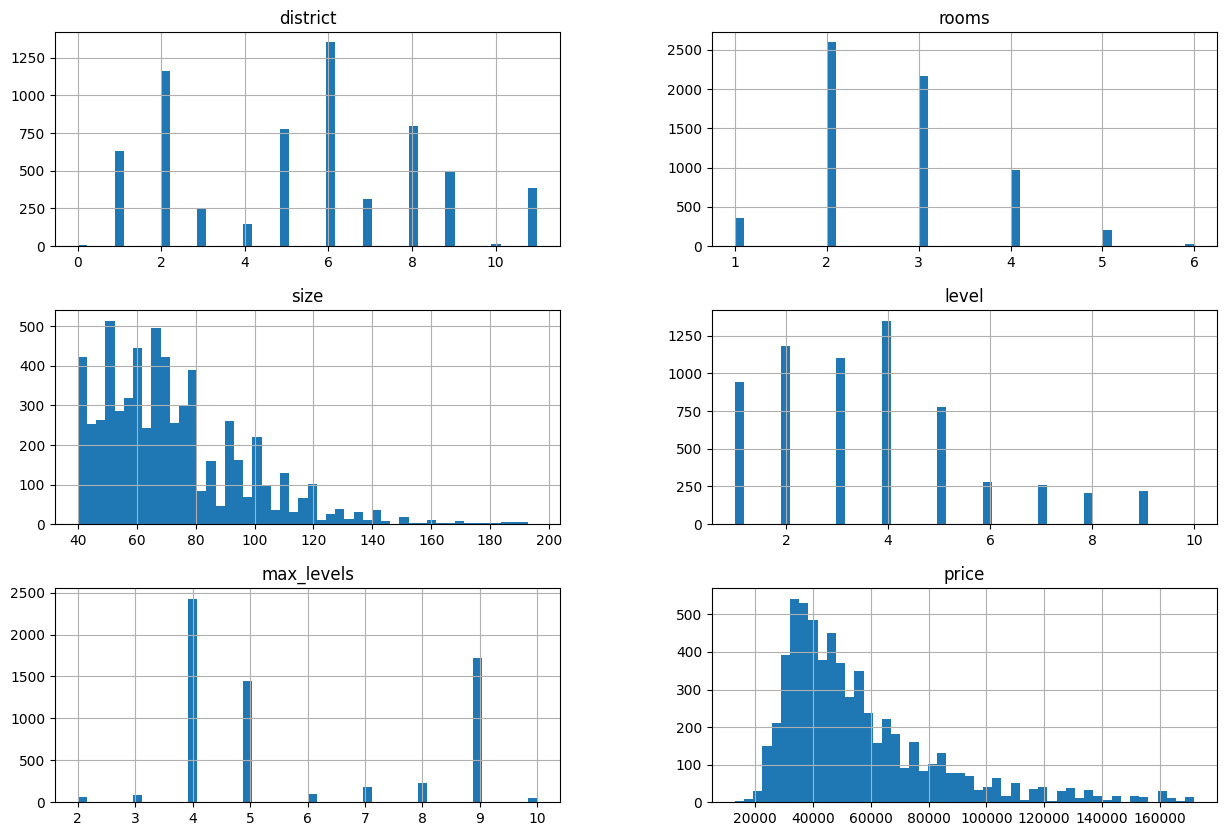

In [ ]:
%matplotlib inline
df1.hist(bins=50, figsize=(15,10))
plt.show()

##ML turi Supervised

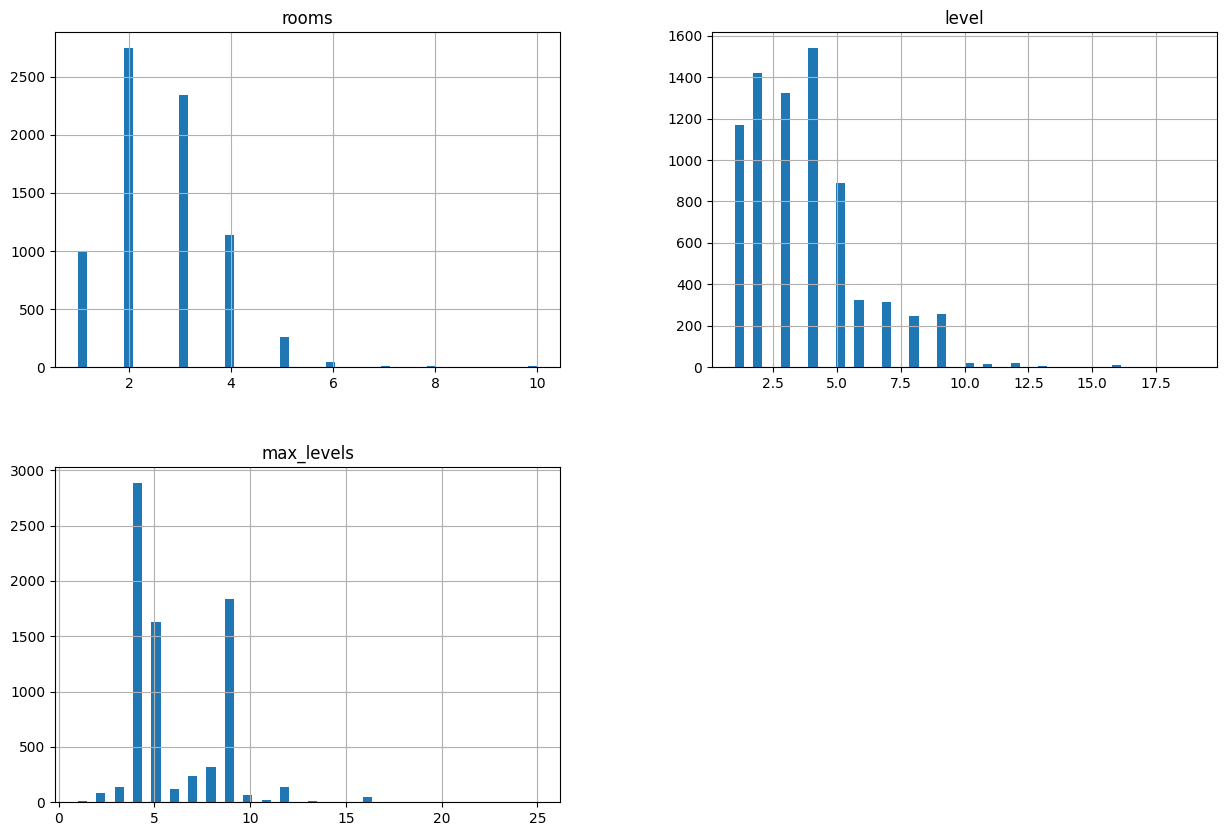

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(15,10))
plt.show()

ValueError: could not convert string to float: 'Договорная'

In [ ]:
df1.corrwith(df1['price'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df1['price']

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7278, dtype: float64

In [ ]:
df1[df1['price'].isnull()]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,NaN
...,...,...,...,...,...,...,...
6954,"город Ташкент, Шайхантахурский район, Ташкент ...",Шайхантахурский,3,114.0,5,7,NaN
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,NaN
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,NaN
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,NaN


NaN qiymatlarni tashlab yuboramiz

In [ ]:
df1.dropna(subset=['size'], inplace=True)
df1.dropna(subset=['price'], inplace=True)

<ipython-input-43-6b1057826c28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['price'], inplace=True)


In [ ]:
df1.describe()

,rooms,size,level,max_levels,price
count,7186.000000,7186.000000,7186.000000,7186.000000,7.186000e+03
mean,2.587253,113.392424,3.619816,5.916226,7.074271e+04
std,1.011128,1529.743577,2.043349,2.260291,6.526038e+05
min,1.000000,1.000000,1.000000,3.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,2.000000,65.000000,3.000000,5.000000,4.600000e+04
75%,3.000000,84.000000,5.000000,9.000000,6.587425e+04
max,5.000000,70000.000000,9.000000,12.000000,5.200000e+07


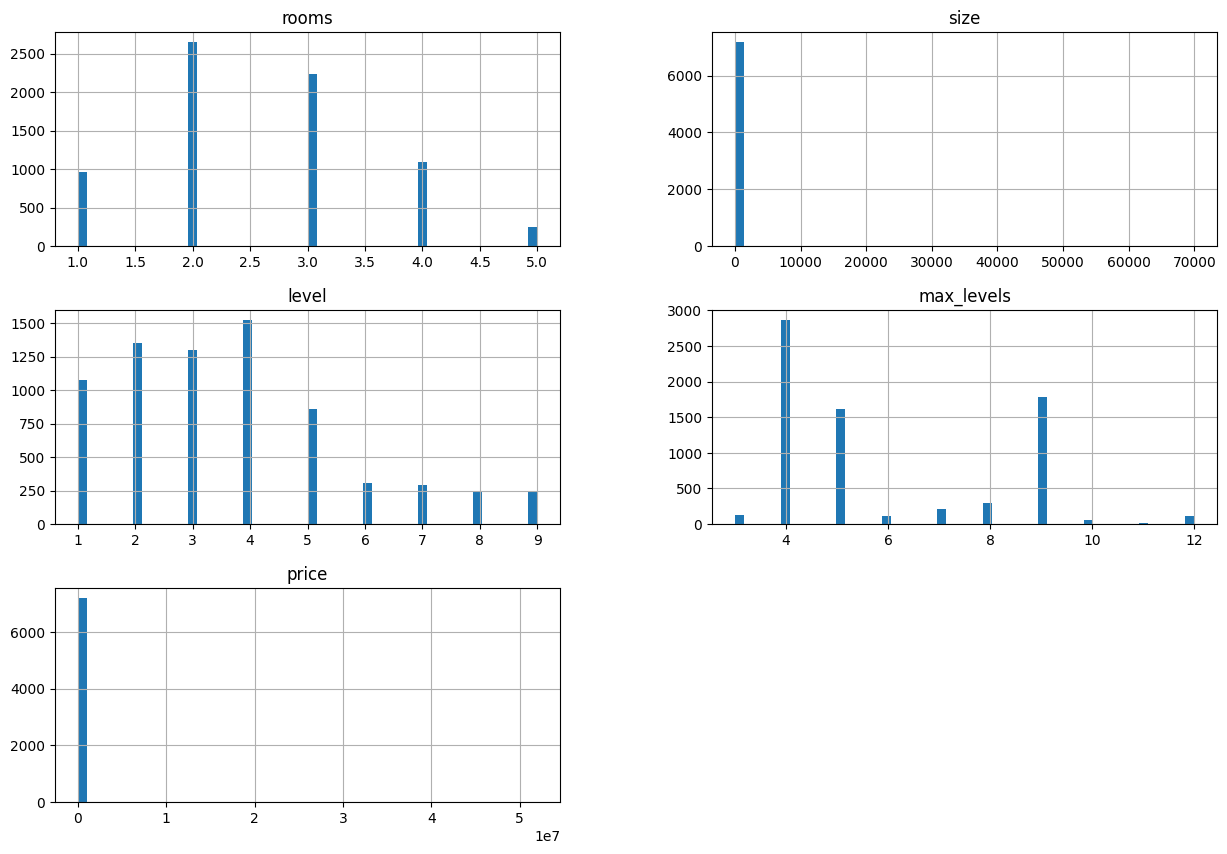

In [ ]:
%matplotlib inline
df1.hist(bins=50, figsize=(15,10))
plt.show()

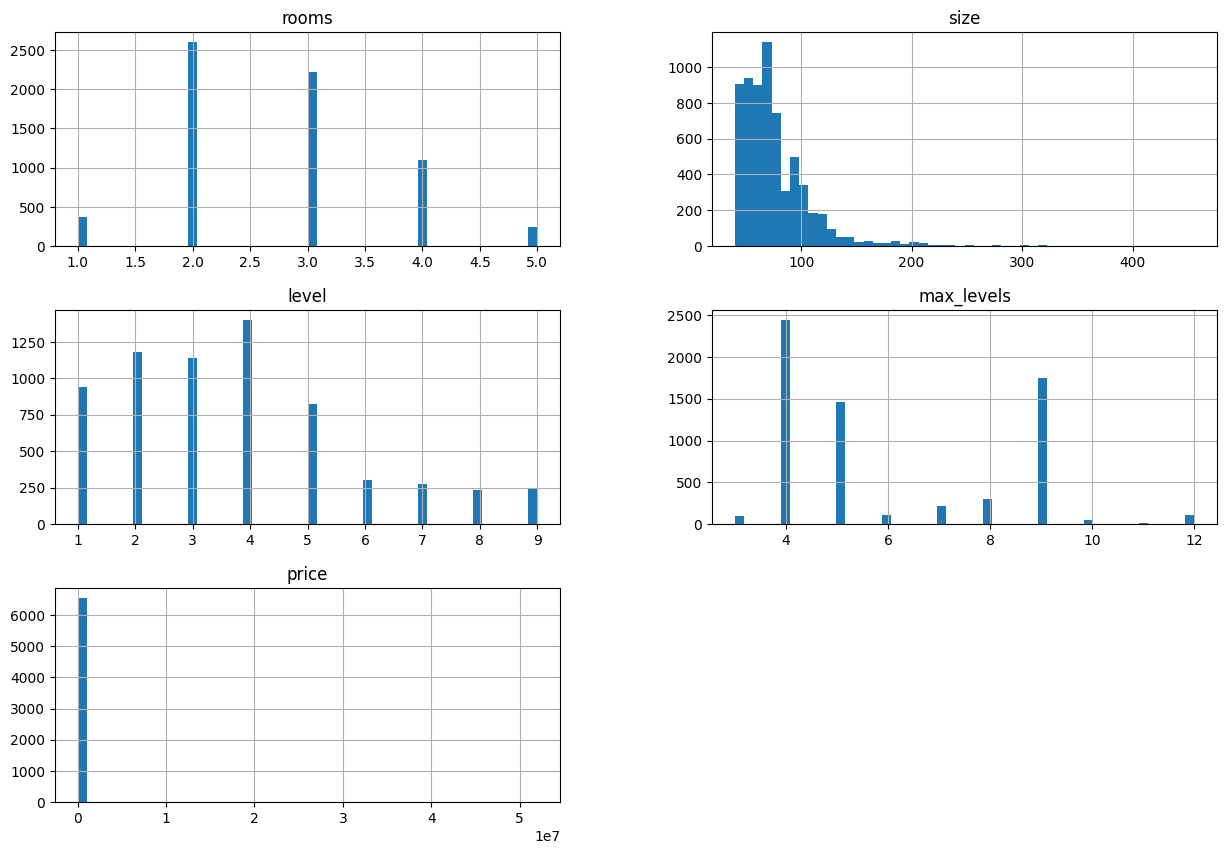

In [ ]:
%matplotlib inline
df1.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
df1.price

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7555    90000.0
7556    36500.0
7557    57000.0
7561    32000.0
7562    40000.0
Name: price, Length: 6540, dtype: float64

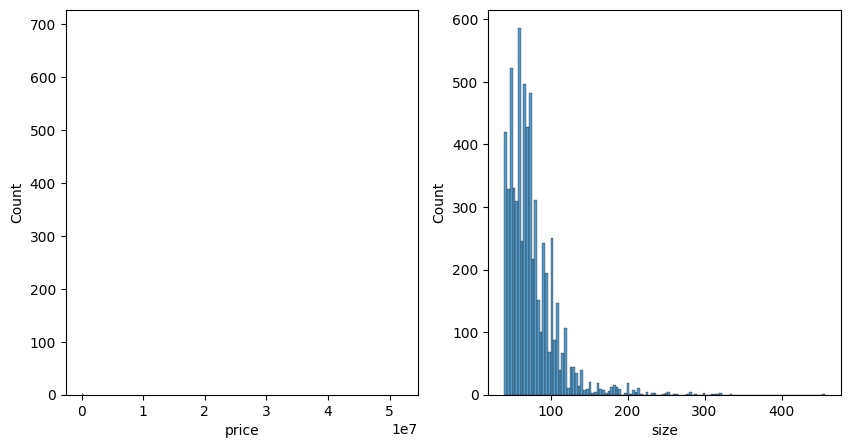

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df1, x='price')
plt.subplot(1,2,2)
sns.histplot(data=df1, x='size')
plt.show()